In [2]:
import xarray as xr
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from math import e
from joblib import dump, load
import xskillscore as xs
import cartopy.crs as ccrs
import iris
import iris.plot as iplt
import iris.quickplot as qplt
import matplotlib.cm as mpl_cm
from eofs.xarray import Eof

# Fog IPSL-CM6A-LR

In [3]:
## CF Future
ssps=['126','245','370','585']
#ssps=['370']

(392,)


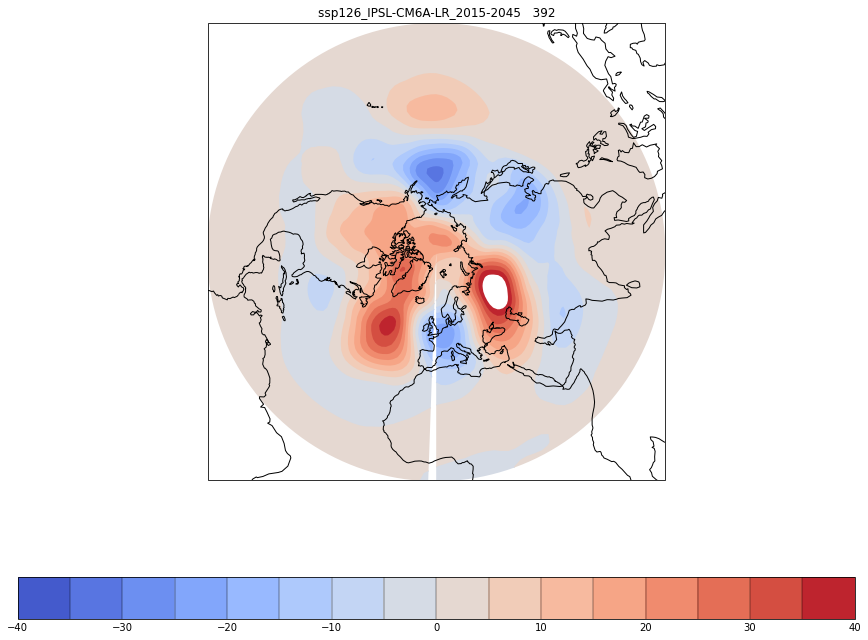

(590,)


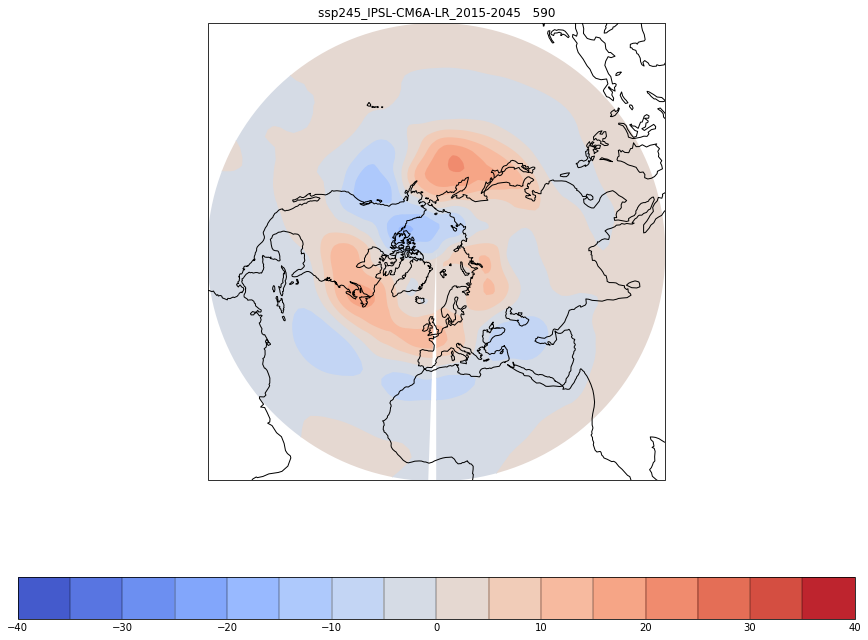

(504,)


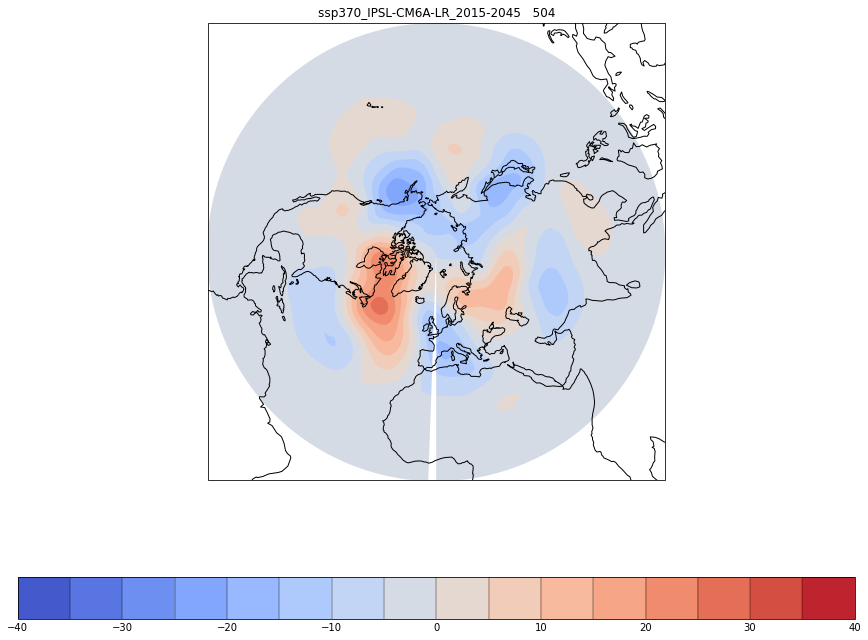

(474,)


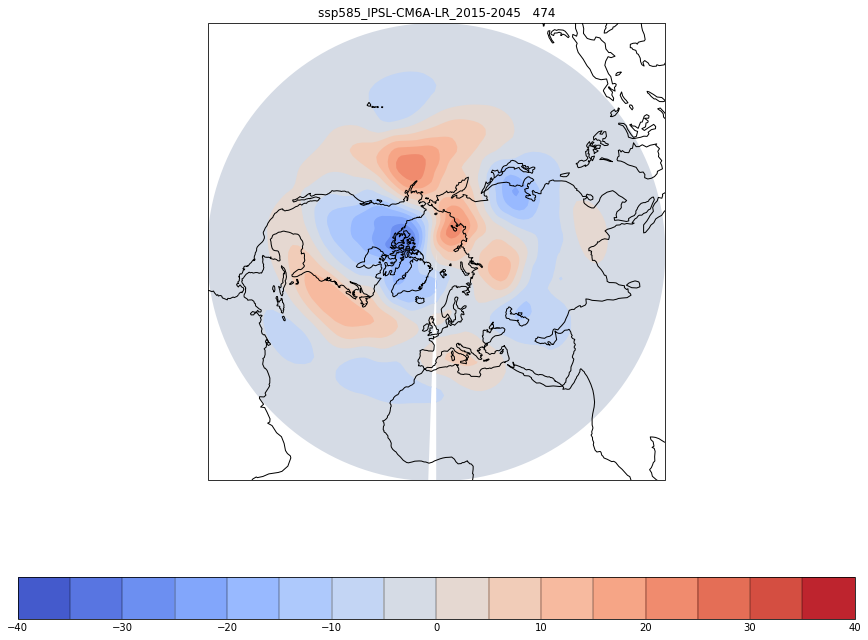

In [8]:

for sp in ssps :
    IPSL_CM6A_LR_CNN = load('../../June2021/New_ssp'+sp+'/Modelplots_future/ACCESS-CM2_ssp'+sp+'.joblib').sel(time=slice('2015-1-1','2045-12-31'))
    IPSL_CM6A_LR_CNN
    folderString='/home/cccr/diptih/dipti/Data/ssp'+sp+'/IPSL-CM6A-LR/processed/'

    zLevData =  zLevData=xr.open_dataset(folderString+'Regrid_zg_day_IPSL-CM6A-LR_ssp'+sp+'_r1i1p1f1_gr_20150101-21001231.nc')
    zLevData
    zAll=zLevData.sel(plev=50000,method='nearest').zg
    z=zAll[((zAll.time.dt.month>11) | (zAll.time.dt.month<2))].sel(time=slice('2015-1-1','2045-12-31'))
    z


    ## Calculate daily Anomaly
    da = z.assign_coords(month_day=z.time.dt.strftime("%m-%d"))
    dailyAnomZ = da.groupby("month_day") - da.groupby("month_day").mean("time")
    decJanAnomz=dailyAnomZ[(dailyAnomZ.time.dt.month>11) | (dailyAnomZ.time.dt.month<2)].sel(time=slice('2015-1-1','2045-12-31'))
    IPSL_CM6A_LR_CNN['time'] = decJanAnomz.time
    da


    # get WFD daily anomaly
    wfdZ=decJanAnomz[IPSL_CM6A_LR_CNN >0.46,:,:]
    wfdZ.time
    wfdZ
    print(wfdZ.time.shape)
    wfdComp=wfdZ.mean(dim="time")

    ndays=wfdZ.time.shape[0]
    ndays

    wfdZComp_cube=wfdComp.to_iris()
    wfdZComp_cube
#wfdZComp_cube_small=wfdComp.sel(latitude=slice(50,0),longitude=slice(30,120)).to_iris()
#wfdZComp_cube_small

    fig = plt.figure(figsize=(15,12))
    levels = (-40,-35,-30,-25,-20,-15,-10,-5, 0,5,10,15,20,25,30,35,40)
    ax = plt.axes(projection=ccrs.NorthPolarStereo(central_longitude=0))
#ax.set_global()

    # Northern Hemisphere from 23 degrees north:
    ax.set_extent([-180, 180, 0, 90], crs=ccrs.PlateCarree())
    qplt.contourf(wfdZComp_cube,cmap='coolwarm',levels=levels)
    ax.set_title('ssp'+sp+'_IPSL-CM6A-LR_2015-2045   '+str(ndays))
    ax.coastlines()
    plt.savefig('ssp'+sp+'_IPSL-CM6A-LR_2015-2045.eps')
    qplt.show()

#plt.show()


(155,)


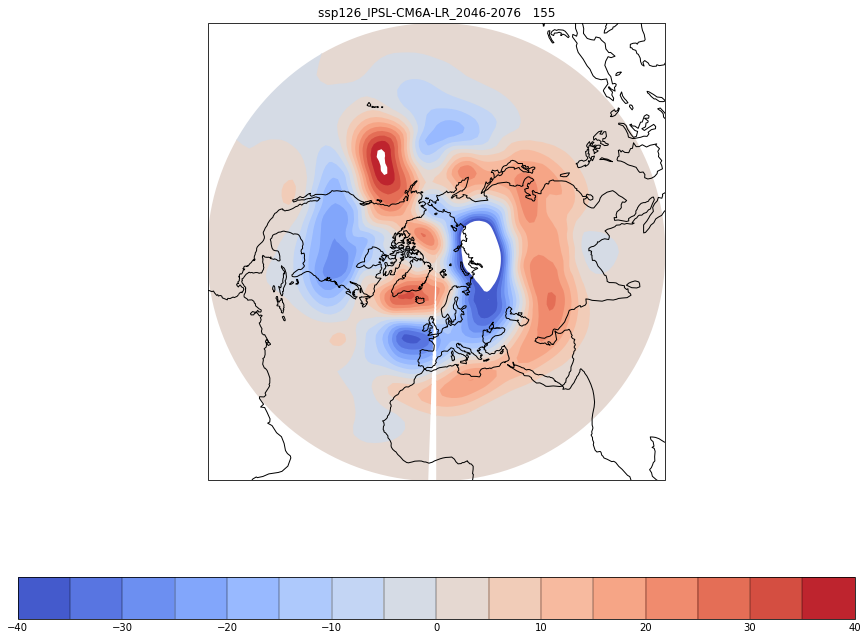

(206,)


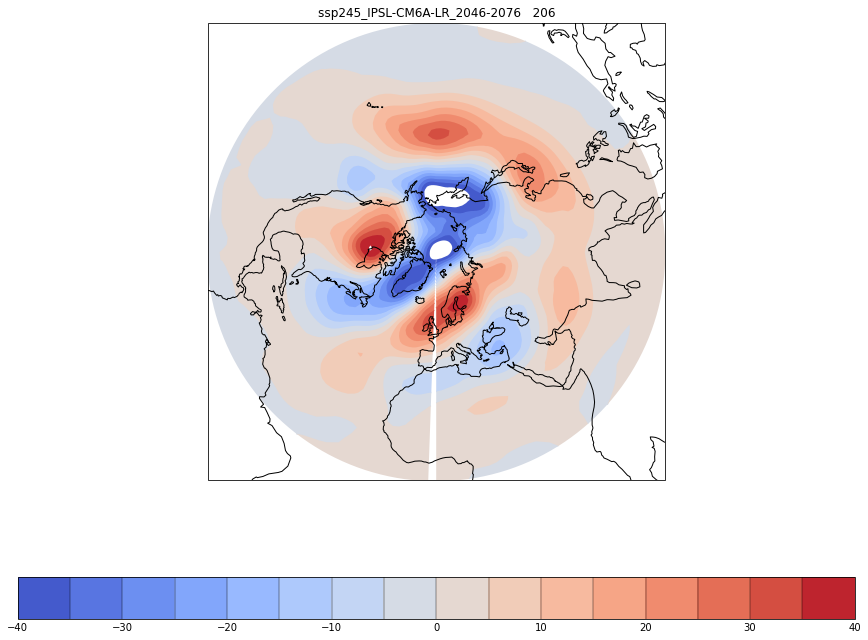

(349,)


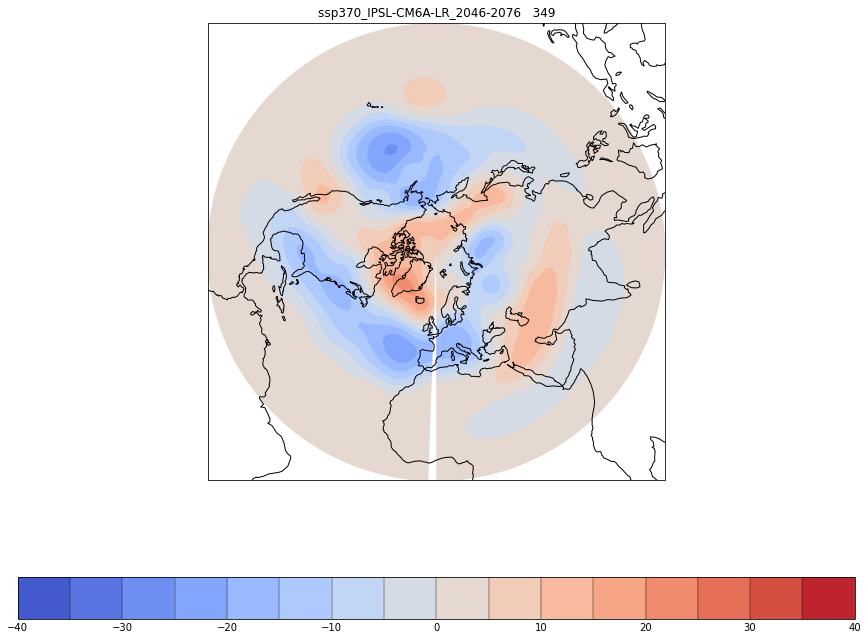

(214,)


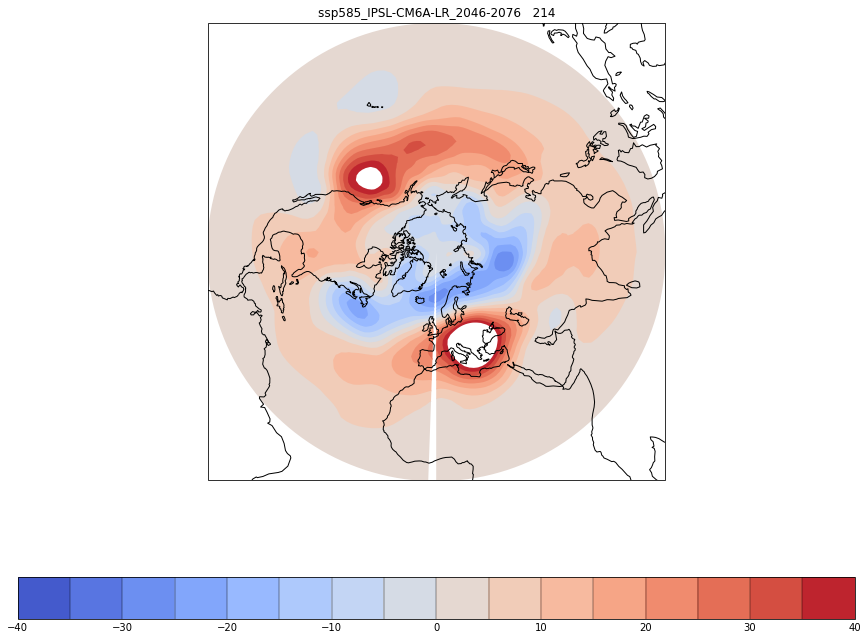

In [9]:

for sp in ssps :
    IPSL_CM6A_LR_CNN = load('../../June2021/New_ssp'+sp+'/Modelplots_future/ACCESS-CM2_ssp'+sp+'.joblib').sel(time=slice('2046-1-1','2076-12-31'))
    IPSL_CM6A_LR_CNN
    folderString='/home/cccr/diptih/dipti/Data/ssp'+sp+'/IPSL-CM6A-LR/processed/'

    zLevData =  zLevData=xr.open_dataset(folderString+'Regrid_zg_day_IPSL-CM6A-LR_ssp'+sp+'_r1i1p1f1_gr_20150101-21001231.nc')
    zLevData
    zAll=zLevData.sel(plev=50000,method='nearest').zg
    z=zAll[((zAll.time.dt.month>11) | (zAll.time.dt.month<2))].sel(time=slice('2046-1-1','2076-12-31'))
    z


    ## Calculate daily Anomaly
    da = z.assign_coords(month_day=z.time.dt.strftime("%m-%d"))
    dailyAnomZ = da.groupby("month_day") - da.groupby("month_day").mean("time")
    decJanAnomz=dailyAnomZ[(dailyAnomZ.time.dt.month>11) | (dailyAnomZ.time.dt.month<2)].sel(time=slice('2046-1-1','2076-12-31'))
    IPSL_CM6A_LR_CNN['time'] = decJanAnomz.time
    da


    # get WFD daily anomaly
    wfdZ=decJanAnomz[IPSL_CM6A_LR_CNN >0.46,:,:]
    wfdZ.time
    wfdZ
    print(wfdZ.time.shape)
    wfdComp=wfdZ.mean(dim="time")

    ndays=wfdZ.time.shape[0]
    ndays

    wfdZComp_cube=wfdComp.to_iris()
    wfdZComp_cube
#wfdZComp_cube_small=wfdComp.sel(latitude=slice(50,0),longitude=slice(30,120)).to_iris()
#wfdZComp_cube_small

    fig = plt.figure(figsize=(15,12))
    levels = (-40,-35,-30,-25,-20,-15,-10,-5, 0,5,10,15,20,25,30,35,40)
    ax = plt.axes(projection=ccrs.NorthPolarStereo(central_longitude=0))
#ax.set_global()

    # Northern Hemisphere from 23 degrees north:
    ax.set_extent([-180, 180, 0, 90], crs=ccrs.PlateCarree())
    qplt.contourf(wfdZComp_cube,cmap='coolwarm',levels=levels)
    ax.set_title('ssp'+sp+'_IPSL-CM6A-LR_2046-2076   '+str(ndays))
    ax.coastlines()
    plt.savefig('ssp'+sp+'_IPSL-CM6A-LR_2046-2076.eps')
    qplt.show()

#plt.show()


(102,)
(164,)
(235,)
(216,)


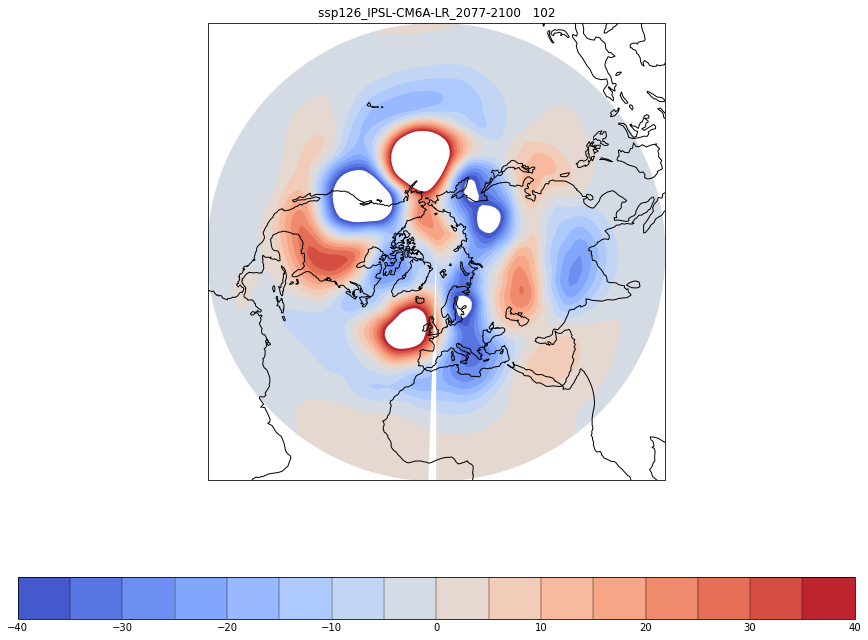

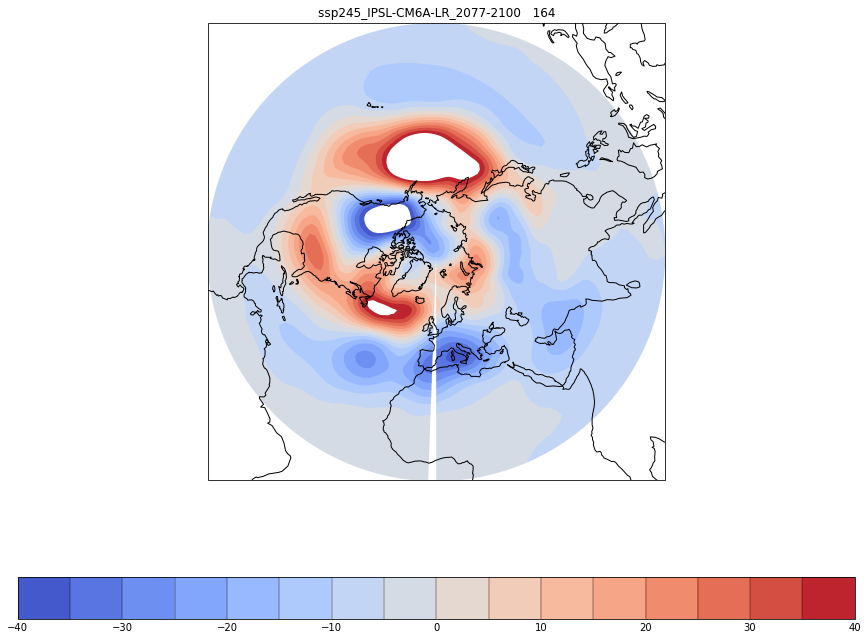

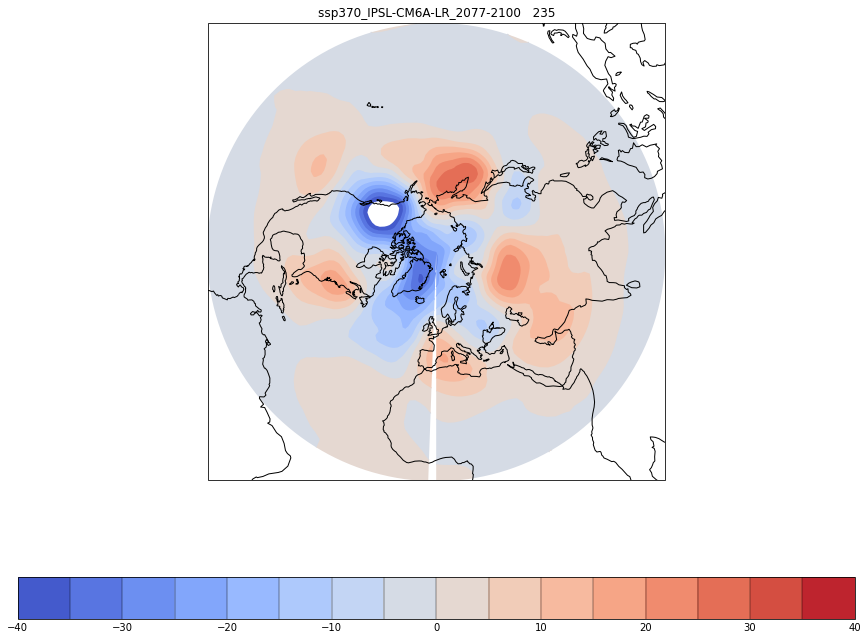

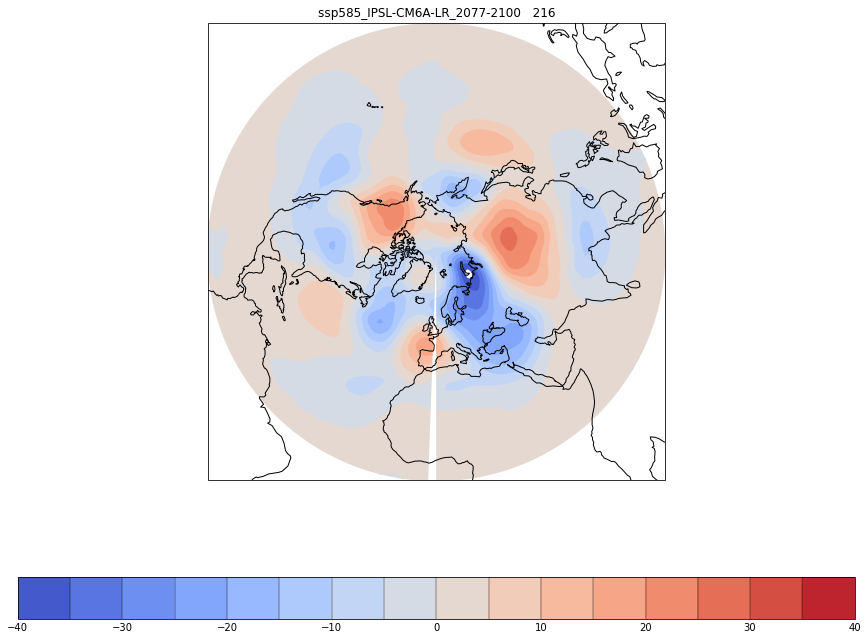

In [11]:
for sp in ssps :
    IPSL_CM6A_LR_CNN = load('../../June2021/New_ssp'+sp+'/Modelplots_future/ACCESS-CM2_ssp'+sp+'.joblib').sel(time=slice('2077-1-1','2100-12-31'))
    IPSL_CM6A_LR_CNN
    folderString='/home/cccr/diptih/dipti/Data/ssp'+sp+'/IPSL-CM6A-LR/processed/'

    zLevData =  zLevData=xr.open_dataset(folderString+'Regrid_zg_day_IPSL-CM6A-LR_ssp'+sp+'_r1i1p1f1_gr_20150101-21001231.nc')
    zLevData
    zAll=zLevData.sel(plev=50000,method='nearest').zg
    z=zAll[((zAll.time.dt.month>11) | (zAll.time.dt.month<2))].sel(time=slice('2077-1-1','2100-12-31'))
    z


    ## Calculate daily Anomaly
    da = z.assign_coords(month_day=z.time.dt.strftime("%m-%d"))
    dailyAnomZ = da.groupby("month_day") - da.groupby("month_day").mean("time")
    decJanAnomz=dailyAnomZ[(dailyAnomZ.time.dt.month>11) | (dailyAnomZ.time.dt.month<2)].sel(time=slice('2077-1-1','2100-12-31'))
    IPSL_CM6A_LR_CNN['time'] = decJanAnomz.time
    da


    # get WFD daily anomaly
    wfdZ=decJanAnomz[IPSL_CM6A_LR_CNN >0.46,:,:]
    wfdZ.time
    wfdZ
    print(wfdZ.time.shape)
    wfdComp=wfdZ.mean(dim="time")

    ndays=wfdZ.time.shape[0]
    ndays

    wfdZComp_cube=wfdComp.to_iris()
    wfdZComp_cube
#wfdZComp_cube_small=wfdComp.sel(latitude=slice(50,0),longitude=slice(30,120)).to_iris()
#wfdZComp_cube_small

    fig = plt.figure(figsize=(15,12))
    levels = (-40,-35,-30,-25,-20,-15,-10,-5, 0,5,10,15,20,25,30,35,40)
    ax = plt.axes(projection=ccrs.NorthPolarStereo(central_longitude=0))
#ax.set_global()

    # Northern Hemisphere from 23 degrees north:
    ax.set_extent([-180, 180, 0, 90], crs=ccrs.PlateCarree())
    qplt.contourf(wfdZComp_cube,cmap='coolwarm',levels=levels)
    ax.set_title('ssp'+sp+'_IPSL-CM6A-LR_2077-2100   '+str(ndays))
    ax.coastlines()
plt.savefig('IPSL-CM6A-LR_2077-2100.eps')
qplt.show()

#plt.show()


# Z500

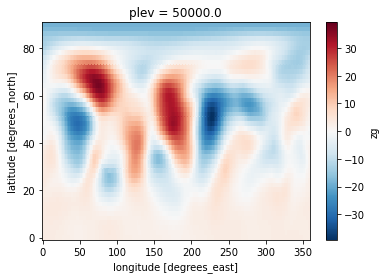

In [5]:
# Composite of WFD
# Get Composite anomoaly for fog days
wfdComp=wfdZ.mean(dim="time")
wfdComp.plot()

# Positive Anomalies 

# Negative Anomalies 